### Imports

In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
#import pandas as pd
#import seaborn as sns

### Data structure

In [3]:
data = h5py.File('cutout_344137.hdf5','r')

In [4]:
print(data.keys())

<KeysViewHDF5 ['Header', 'PartType1']>


In [22]:
for k in data["Header"].attrs:
    print(k, data["Header"].attrs[k])

BoxSize 35000.0
CutoutID 344137
CutoutRequest PartType0=CenterOfMass,Coordinates,Density,ElectronAbundance,EnergyDissipation,GFM_AGNRadiation,GFM_CoolingRate,GFM_Metallicity,GFM_Metals,GFM_MetalsTagged,GFM_WindDMVelDisp,GFM_WindHostHaloMass,InternalEnergy,Machnumber,MagneticField,MagneticFieldDivergence,Masses,NeutralHydrogenAbundance,ParticleIDs,Potential,StarFormationRate,SubfindDMDensity,SubfindDensity,SubfindHsml,SubfindVelDisp,Velocities+PartType1=Coordinates,ParticleIDs,Potential,SubfindDMDensity,SubfindDensity,SubfindHsml,SubfindVelDisp,Velocities+PartType3=FluidQuantities,ParentID,TracerID+PartType4=BirthPos,BirthVel,Coordinates,GFM_InitialMass,GFM_Metallicity,GFM_Metals,GFM_MetalsTagged,GFM_StellarFormationTime,GFM_StellarPhotometrics,Masses,ParticleIDs,Potential,StellarHsml,SubfindDMDensity,SubfindDensity,SubfindHsml,SubfindVelDisp,Velocities+PartType5=BH_BPressure,BH_CumEgyInjection_QM,BH_CumEgyInjection_RM,BH_CumMassGrowth_QM,BH_CumMassGrowth_RM,BH_Density,BH_HostHaloMass,B

In [24]:
data['Header'].attrs

<Attributes of HDF5 object at 5156937840>

In [5]:
data['PartType1'].keys()

<KeysViewHDF5 ['Coordinates', 'ParticleIDs', 'Potential', 'SubfindDMDensity', 'SubfindDensity', 'SubfindHsml', 'SubfindVelDisp', 'Velocities']>

### Units

In [10]:
from astropy import units as u
from astropy import constants as const

In [12]:
from astropy.units import km, au, pc, kpc, s, yr, Myr, Gyr, Msun, rad, kg, J

In [13]:
xyz = np.array(data['PartType1']['Coordinates'][:])
phi = np.array(data['PartType1']['Potential'][:])
vxyz = np.array(data['PartType1']['Velocities'][:])
print(xyz.shape), print(phi.shape), print(vxyz.shape)

(268525, 3)
(268525,)
(268525, 3)


(None, None, None)

In [14]:
#distances
r = np.linalg.norm(xyz, axis=1)
x, y, z = xyz[:,0], xyz[:,1], xyz[:,2]
R = np.sqrt(x**2 + y**2)

#velocities
vx, vy, vz = vxyz[:,0], vxyz[:,1], vxyz[:,2]
v = np.linalg.norm(vxyz, axis=1)

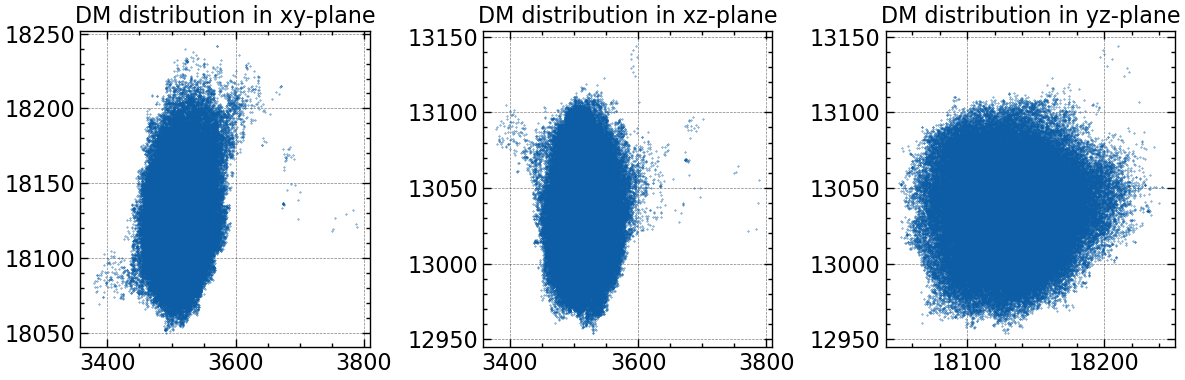

In [15]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
axes[0].scatter(x, y, s=0.1)
axes[0].set_title("DM distribution in xy-plane")
axes[1].scatter(x, z, s=0.1)
axes[1].set_title("DM distribution in xz-plane")
axes[2].scatter(y, z, s=0.1)
axes[2].set_title("DM distribution in yz-plane")
plt.tight_layout()
plt.show()


In [16]:
from mpl_toolkits.mplot3d import Axes3D

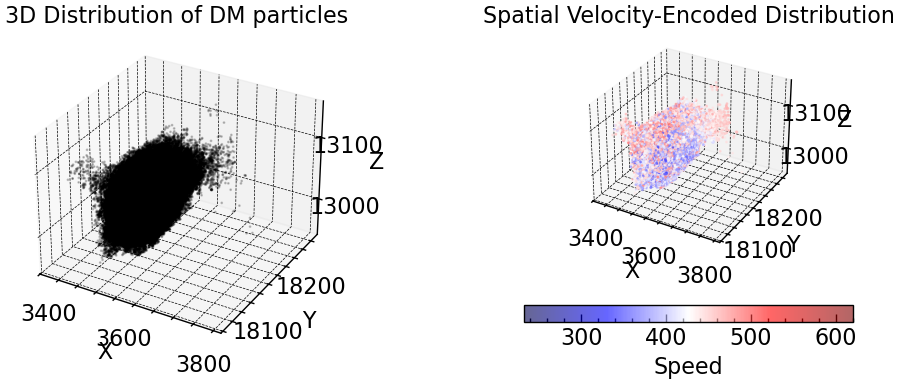

In [17]:
fig = plt.figure(figsize=(12, 4))
ax= fig.add_subplot(1,2,1, projection='3d')
ax.scatter(x, y, z, s=1, c='k', alpha=0.2)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Distribution of DM particles')

ax2 = fig.add_subplot(1, 2, 2, projection='3d')
sc = ax2.scatter(x, y, z, s=1, c=v, cmap='seismic', alpha=0.6)
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')
ax2.set_title('Spatial Velocity-Encoded Distribution')

fig.colorbar(sc, ax=ax2, label='Speed', orientation='horizontal', shrink=0.5)
plt.tight_layout()
plt.show()


#### Compute relative distance R, so we can transfer to cillyndrical coördinates and make a 2D plot

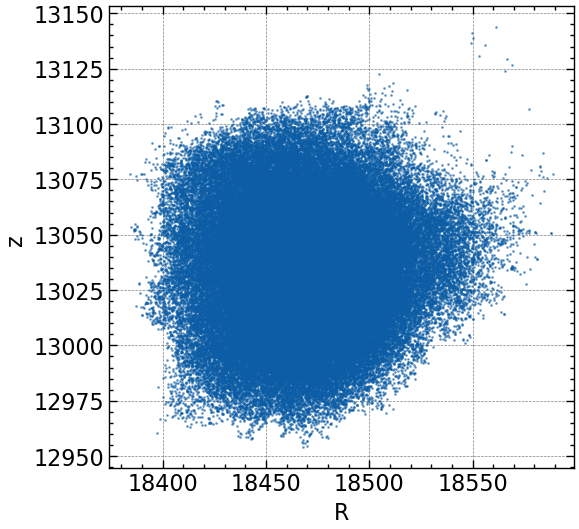

In [20]:
plt.figure(figsize=(6, 6))
plt.scatter(R, z, s=1, alpha=0.5)
plt.xlabel('R')
plt.ylabel('z ')
plt.grid(True)
plt.show()

Compute a histogram for diffrent radii

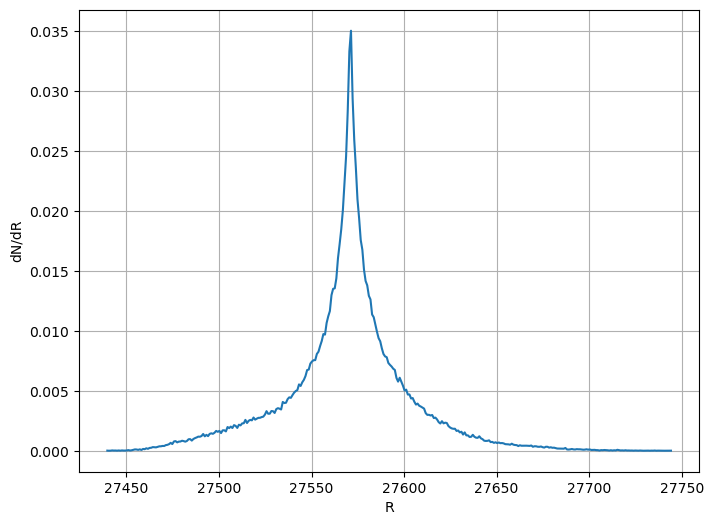

In [10]:
bins = np.linspace(0, R.max(), 100)  

counts, bin_edges = np.histogram(R, bins='auto', density= True)
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])

plt.figure(figsize=(8,6))
plt.plot(bin_centers, counts)
plt.xlabel('R')
plt.ylabel('dN/dR')
plt.grid(True)
plt.show()

fewer at edges, more near the centre (bulk)

In [ ]:
#tes

Hallo this is a markdown cell.